In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os

In [65]:
os.chdir("/content/drive/My Drive/Project/DengAI")
os.listdir()

['dengue_labels_train.csv',
 'dengue_features_train.csv',
 'dengue_features_test.csv',
 'submission_format.csv',
 'DengAI -1.ipynb',
 'dengai-2.ipynb',
 'firstsubmission.csv',
 'DengAI_Sarimax_final.ipynb',
 'DengAI auto_arima.ipynb',
 '.ipynb_checkpoints',
 'secondsubmission.csv',
 'DengAI_time_series_Finalmentor.ipynb']

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Data Preprocessing

In [0]:
train=pd.read_csv('dengue_features_train.csv')
test=pd.read_csv('dengue_features_test.csv')
train_label=pd.read_csv('dengue_labels_train.csv')

In [0]:
train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [0]:
train.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0
1455,iq,2010,25,2010-06-25,0.298186,0.232971,0.274214,0.315757,63.22,298.097143,299.835714,295.807143,307.8,292.3,36.90,89.082857,63.22,17.355714,11.014286,27.475000,9.900000,33.7,22.2,20.4


In [0]:
train.city=='sj'.count

0       False
1       False
2       False
3       False
4       False
        ...  
1451    False
1452    False
1453    False
1454    False
1455    False
Name: city, Length: 1456, dtype: bool

Train features and train labels for the two cities are present in train and train_label dataframe.So we need extract train features and train lables of two different cities and store them seperately in two differnet variables.

In [0]:
sj_train_features=train.loc[train['city']=='sj']
sj_train_label=train_label.loc[train_label['city']=='sj']

In [0]:
iq_train_features=train.loc[train['city']=='iq']
iq_train_labels=train_label.loc[train_label['city']=='iq']

In [0]:
sj_train_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [0]:
sj_train_features.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
931,sj,2008,13,2008-03-25,0.07785,-0.039900,0.310471,0.296243,27.19,296.958571,296.957143,292.095714,299.7,294.4,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8
932,sj,2008,14,2008-04-01,-0.03800,-0.016833,0.119371,0.066386,3.82,298.081429,298.228571,293.235714,299.8,296.5,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5
933,sj,2008,15,2008-04-08,-0.15520,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,292.732857,299.4,295.8,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7
934,sj,2008,16,2008-04-15,0.00180,NaN,0.203900,0.209843,0.00,297.630000,297.778571,292.274286,299.7,295.9,4.82,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2
935,sj,2008,17,2008-04-22,-0.03700,-0.010367,0.077314,0.090586,0.00,298.672857,298.692857,294.280000,300.9,295.9,2.17,76.960000,0.00,15.671429,3.957143,27.042857,7.514286,31.7,23.3,0.3


In [0]:
sj_train_features.shape

(936, 24)

In [0]:
sj_train_label.shape

(936, 4)

In [0]:
pd.isnull(sj_train_features).any()

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_t

Fill all null values

In [0]:
sj_train_features.fillna(method='ffill',inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [0]:
pd.isnull(iq_train_features).any()

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_t

In [0]:
iq_train_features.fillna(method='ffill',inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [0]:
pd.isnull(sj_train_features).any()

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_t

In [0]:
pd.isnull(iq_train_features).any()

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_t

In [0]:
sj_train_label.total_cases.describe()

count    936.000000
mean      34.180556
std       51.381372
min        0.000000
25%        9.000000
50%       19.000000
75%       37.000000
max      461.000000
Name: total_cases, dtype: float64

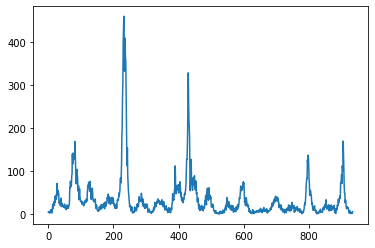

In [0]:
sj_train_label.total_cases.plot()

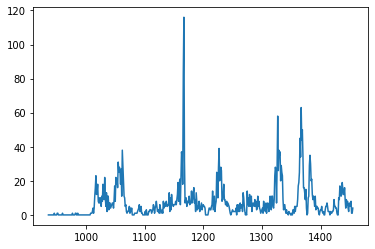

In [0]:
iq_train_labels.total_cases.plot()

In [0]:
sj_train_features['total_cases']=sj_train_label.total_cases
iq_train_features['total_cases']=iq_train_labels.total_cases

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
sj_train_features['week_start_date'] =  pd.to_datetime(sj_train_features['week_start_date'], format='%Y-%m-%d')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
sj_train_features.index=sj_train_features['week_start_date']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


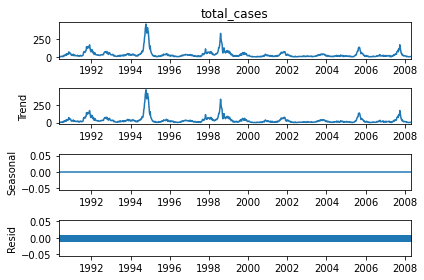

In [0]:

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(sj_train_features['total_cases'],model='additive',freq=1)
fig = result.plot()


In [0]:
sj_train_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
week_start_date,,,,,,,,,,,,,,,,,,,,,,,,,
1990-04-30,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1990-05-07,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
1990-05-14,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
1990-05-21,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
1990-05-28,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


 ARIMA  MODEL FOR SJ

In [0]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 2.8MB/s 
     |████████████████████████████████| 8.7MB 16.1MB/s 
     |████████████████████████████████| 2.1MB 48.6MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.19
    Uninstalling Cython-0.29.19:
      Successfully uninstalled Cython-0.29.19


In [0]:
from pmdarima.arima import auto_arima

In [0]:
arima_model_sj=auto_arima(sj_train_features['total_cases'],stationary=True,trace=True)
arima_model_sj.summary()

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=7490.925, BIC=7519.974, Time=1.013 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=10033.577, BIC=10043.260, Time=0.037 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=7537.460, BIC=7551.985, Time=0.083 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=9061.112, BIC=9075.637, Time=0.274 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=10374.835, BIC=10379.677, Time=0.112 seconds
Fit ARIMA(1,0,2)x(0,0,0,0) [intercept=True]; AIC=7509.307, BIC=7533.515, Time=0.565 seconds
Fit ARIMA(2,0,1)x(0,0,0,0) [intercept=True]; AIC=7488.982, BIC=7513.191, Time=0.582 seconds
Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=7520.965, BIC=7540.332, Time=0.347 seconds
Fit ARIMA(2,0,0)x(0,0,0,0) [intercept=True]; AIC=7516.329, BIC=7535.696, Time=0.205 seconds
Fit ARIMA(3,0,1)x(0,0,0,0) [intercept=True]; AIC=7490.924, BIC=7519.974, Time=1.307 seconds
Fit ARIMA(3,0,0)x(0,0,0,0) [inte

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA(3,0,2)x(0,0,0,0) [intercept=True]; AIC=7490.084, BIC=7523.975, Time=2.049 seconds
Total fit time: 7.122 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  936
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -3739.491
Date:                Thu, 04 Jun 2020   AIC                           7488.982
Time:                        06:59:57   BIC                           7513.191
Sample:                             0   HQIC                          7498.213
                                - 936                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4932      0.158      3.129      0.002       0.184       0.802
ar.L1          1.8504      0.027     68.911      0.000       1.798       1.903
ar.L2         -0.8649      0.026    -33.623      0.000      -0.915      -0.814
ma.L1         -0.7831      0.034    -22.778      0.000      -0.851      -0.716
sigma2       172.3351      3.220     53.515      0.000     166.023     178.647
===================================================================================
Ljung-Box (Q):                       46.45   Jarque-Bera (JB):              5058.29
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                             0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
print(arima_model_sj.aic())

7488.982474167466


ARIMAX MODEL - SJ

In [0]:
combined = sj_train_features.loc[:,['precipitation_amt_mm','reanalysis_relative_humidity_percent','reanalysis_dew_point_temp_k',
                               'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k','reanalysis_avg_temp_k','station_diur_temp_rng_c']]

In [0]:
arima_model_sj_arimax=auto_arima(sj_train_features['total_cases'],stationary=True,exogenous=combined,trace=True)
arima_model_sj_arimax.summary()

Performing stepwise search to minimize aic


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=7904.440, BIC=7967.381, Time=3.409 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=9995.205, BIC=10038.780, Time=0.974 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=7833.238, BIC=7881.654, Time=1.499 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=9119.183, BIC=9167.599, Time=2.537 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=9993.206, BIC=10031.939, Time=0.833 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,0,0)x(0,0,0,0) [intercept=True]; AIC=7833.632, BIC=7886.890, Time=2.807 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=7836.841, BIC=7890.099, Time=2.664 seconds
Fit ARIMA(2,0,1)x(0,0,0,0) [intercept=True]; AIC=7836.470, BIC=7894.569, Time=3.180 seconds
Total fit time: 17.925 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  936
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -3906.619
Date:                Thu, 04 Jun 2020   AIC                           7833.238
Time:                        08:17:41   BIC                           7881.654
Sample:                             0   HQIC                          7851.699
                                - 936                                         
Covariance Type:                  opg                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
intercept                               -2.2684     15.796     -0.144      0.886     -33.229      28.692
precipitation_amt_mm                    -0.0076      0.011     -0.695      0.487      -0.029       0.014
reanalysis_relative_humidity_percent   -17.3744      0.917    -18.942      0.000     -19.172     -15.577
reanalysis_dew_point_temp_k             84.1681      4.320     19.482      0.000      75.700      92.636
reanalysis_max_air_temp_k                2.5059      1.188      2.110      0.035       0.178       4.834
reanalysis_min_air_temp_k               -4.1097      1.128     -3.644      0.000      -6.320      -1.900
reanalysis_avg_temp_k                  -76.6194      3.961    -19.345      0.000     -84.382     -68.857
station_diur_temp_rng_c                 -0.1316      0.738     -0.178      0.858      -1.578       1.315
ar.L1                                    0.9427      0.005    199.329      0.000       0.933       0.952
sigma2                                 242.3154      6.167     39.294      0.000     230.229     254.402
===================================================================================
Ljung-Box (Q):                       60.30   Jarque-Bera (JB):              2190.92
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                             0.84
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
arima_model_sj_arimax.aic()

7833.238049329554

ARIMA MODEL FOR IQ

In [0]:
arima_model_iq=auto_arima(iq_train_features['total_cases'],stationary=True,trace=True)
arima_model_iq.summary()

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=3515.663, BIC=3541.186, Time=0.507 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=3950.093, BIC=3958.601, Time=0.027 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=3528.197, BIC=3540.958, Time=0.097 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=3674.835, BIC=3687.596, Time=0.166 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=4157.130, BIC=4161.384, Time=0.014 seconds
Fit ARIMA(1,0,2)x(0,0,0,0) [intercept=True]; AIC=3514.760, BIC=3536.029, Time=0.245 seconds
Fit ARIMA(0,0,2)x(0,0,0,0) [intercept=True]; AIC=3604.412, BIC=3621.427, Time=0.239 seconds
Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=3526.112, BIC=3543.127, Time=0.241 seconds
Fit ARIMA(1,0,3)x(0,0,0,0) [intercept=True]; AIC=3513.396, BIC=3538.919, Time=0.373 seconds
Fit ARIMA(0,0,3)x(0,0,0,0) [intercept=True]; AIC=3589.490, BIC=3610.759, Time=0.394 seconds
Fit ARIMA(2,0,3)x(0,0,0,0) [intercep

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Fit ARIMA(4,0,2)x(0,0,0,0) [intercept=True]; AIC=3513.644, BIC=3547.674, Time=0.720 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA(2,0,1)x(0,0,0,0) [intercept=True]; AIC=3522.863, BIC=3544.132, Time=0.640 seconds
Fit ARIMA(4,0,1)x(0,0,0,0) [intercept=True]; AIC=3510.061, BIC=3539.837, Time=0.694 seconds
Fit ARIMA(4,0,3)x(0,0,0,0) [intercept=True]; AIC=3507.595, BIC=3545.879, Time=1.553 seconds
Total fit time: 8.814 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  520
Model:               SARIMAX(3, 0, 2)   Log Likelihood               -1745.141
Date:                Thu, 04 Jun 2020   AIC                           3504.282
Time:                        08:26:32   BIC                           3534.058
Sample:                             0   HQIC                          3515.946
                                - 520                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9599      0.919      2.132      0.033       0.158       3.762
ar.L1          0.8352      0.144      5.817      0.000       0.554       1.117
ar.L2         -0.6226      0.197     -3.165      0.002      -1.008      -0.237
ar.L3          0.5243      0.095      5.505      0.000       0.338       0.711
ma.L1         -0.1475      0.156     -0.948      0.343      -0.453       0.158
ma.L2          0.4575      0.151      3.021      0.003       0.161       0.754
sigma2        48.0495      1.132     42.440      0.000      45.831      50.269
===================================================================================
Ljung-Box (Q):                       17.85   Jarque-Bera (JB):             13859.84
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.35   Skew:                             2.50
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
arima_model_iq.aic()

3504.281609618577

ARIMAX MODEL - IQ

In [0]:
combined=iq_train_features.loc[:,['precipitation_amt_mm','reanalysis_relative_humidity_percent','reanalysis_dew_point_temp_k',
                               'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k','reanalysis_avg_temp_k','station_diur_temp_rng_c']]


In [0]:
arima_model_iq_arimax = auto_arima(iq_train_features['total_cases'],                     
                          seasonal=False,
                          exogenous = combined,trace=True,stationary=True)


Performing stepwise search to minimize aic


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be

Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=3525.821, BIC=3581.121, Time=2.157 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=3947.150, BIC=3985.434, Time=0.329 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be

Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=3538.838, BIC=3581.376, Time=0.861 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=3679.838, BIC=3722.376, Time=1.473 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=3945.155, BIC=3979.186, Time=0.599 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be

Fit ARIMA(1,0,2)x(0,0,0,0) [intercept=True]; AIC=3525.161, BIC=3576.207, Time=2.005 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Fit ARIMA(0,0,2)x(0,0,0,0) [intercept=True]; AIC=3612.009, BIC=3658.801, Time=1.745 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=3537.483, BIC=3584.275, Time=1.658 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Fit ARIMA(1,0,3)x(0,0,0,0) [intercept=True]; AIC=3523.352, BIC=3578.652, Time=2.160 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Fit ARIMA(0,0,3)x(0,0,0,0) [intercept=True]; AIC=3597.844, BIC=3648.890, Time=2.100 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Fit ARIMA(2,0,3)x(0,0,0,0) [intercept=True]; AIC=3523.586, BIC=3583.139, Time=2.317 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Fit ARIMA(1,0,4)x(0,0,0,0) [intercept=True]; AIC=3518.504, BIC=3578.058, Time=2.532 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Fit ARIMA(0,0,4)x(0,0,0,0) [intercept=True]; AIC=3556.498, BIC=3611.798, Time=2.385 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Fit ARIMA(2,0,4)x(0,0,0,0) [intercept=True]; AIC=3520.788, BIC=3584.596, Time=2.853 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Fit ARIMA(1,0,5)x(0,0,0,0) [intercept=True]; AIC=3520.453, BIC=3584.260, Time=3.118 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Fit ARIMA(0,0,5)x(0,0,0,0) [intercept=True]; AIC=3533.220, BIC=3592.774, Time=3.060 seconds
Fit ARIMA(2,0,5)x(0,0,0,0) [intercept=True]; AIC=3522.796, BIC=3590.858, Time=3.251 seconds
Total fit time: 34.621 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [0]:
arima_model_iq_arimax.aic()

3518.5043615240397

SARIMA MODEL-SJ

In [0]:
sarima_model_sj = auto_arima(sj_train_features['total_cases'],seasonal=True,trace=True,stationary=True)
sarima_model_sj.summary()

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=7490.925, BIC=7519.974, Time=0.935 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=10033.577, BIC=10043.260, Time=0.037 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=7537.460, BIC=7551.985, Time=0.084 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=9061.112, BIC=9075.637, Time=0.275 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=10374.835, BIC=10379.677, Time=0.021 seconds
Fit ARIMA(1,0,2)x(0,0,0,0) [intercept=True]; AIC=7509.307, BIC=7533.515, Time=0.564 seconds
Fit ARIMA(2,0,1)x(0,0,0,0) [intercept=True]; AIC=7488.982, BIC=7513.191, Time=0.579 seconds
Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=7520.965, BIC=7540.332, Time=0.374 seconds
Fit ARIMA(2,0,0)x(0,0,0,0) [intercept=True]; AIC=7516.329, BIC=7535.696, Time=0.220 seconds
Fit ARIMA(3,0,1)x(0,0,0,0) [intercept=True]; AIC=7490.924, BIC=7519.974, Time=1.301 seconds
Fit ARIMA(3,0,0)x(0,0,0,0) [inte

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA(3,0,2)x(0,0,0,0) [intercept=True]; AIC=7490.084, BIC=7523.975, Time=2.043 seconds
Total fit time: 6.961 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  936
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -3739.491
Date:                Thu, 04 Jun 2020   AIC                           7488.982
Time:                        08:54:22   BIC                           7513.191
Sample:                             0   HQIC                          7498.213
                                - 936                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4932      0.158      3.129      0.002       0.184       0.802
ar.L1          1.8504      0.027     68.911      0.000       1.798       1.903
ar.L2         -0.8649      0.026    -33.623      0.000      -0.915      -0.814
ma.L1         -0.7831      0.034    -22.778      0.000      -0.851      -0.716
sigma2       172.3351      3.220     53.515      0.000     166.023     178.647
===================================================================================
Ljung-Box (Q):                       46.45   Jarque-Bera (JB):              5058.29
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                             0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
sarima_model_sj.aic()

7488.982474167466

SARIMAX MODEL-SJ

In [0]:
combined = sj_train_features.loc[:,['precipitation_amt_mm','reanalysis_relative_humidity_percent','reanalysis_dew_point_temp_k',
                               'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k','reanalysis_avg_temp_k','station_diur_temp_rng_c']]

sarimax_model_sj = auto_arima(sj_train_features['total_cases'],exogenous= combined, seasonal=True,trace=True,stationary=True)
sarimax_model_sj.summary() 

Performing stepwise search to minimize aic


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=7904.440, BIC=7967.381, Time=3.390 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=9995.205, BIC=10038.780, Time=0.991 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=7833.238, BIC=7881.654, Time=1.495 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=9119.183, BIC=9167.599, Time=2.538 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=9993.206, BIC=10031.939, Time=0.823 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,0,0)x(0,0,0,0) [intercept=True]; AIC=7833.632, BIC=7886.890, Time=2.827 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=7836.841, BIC=7890.099, Time=2.700 seconds
Fit ARIMA(2,0,1)x(0,0,0,0) [intercept=True]; AIC=7836.470, BIC=7894.569, Time=3.194 seconds
Total fit time: 17.969 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  936
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -3906.619
Date:                Thu, 04 Jun 2020   AIC                           7833.238
Time:                        08:58:49   BIC                           7881.654
Sample:                             0   HQIC                          7851.699
                                - 936                                         
Covariance Type:                  opg                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
intercept                               -2.2684     15.796     -0.144      0.886     -33.229      28.692
precipitation_amt_mm                    -0.0076      0.011     -0.695      0.487      -0.029       0.014
reanalysis_relative_humidity_percent   -17.3744      0.917    -18.942      0.000     -19.172     -15.577
reanalysis_dew_point_temp_k             84.1681      4.320     19.482      0.000      75.700      92.636
reanalysis_max_air_temp_k                2.5059      1.188      2.110      0.035       0.178       4.834
reanalysis_min_air_temp_k               -4.1097      1.128     -3.644      0.000      -6.320      -1.900
reanalysis_avg_temp_k                  -76.6194      3.961    -19.345      0.000     -84.382     -68.857
station_diur_temp_rng_c                 -0.1316      0.738     -0.178      0.858      -1.578       1.315
ar.L1                                    0.9427      0.005    199.329      0.000       0.933       0.952
sigma2                                 242.3154      6.167     39.294      0.000     230.229     254.402
===================================================================================
Ljung-Box (Q):                       60.30   Jarque-Bera (JB):              2190.92
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                             0.84
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
sarimax_model_sj.aic()

7833.238049329554

SARIMA MODEL - IQ

In [0]:
sarima_model_iq = auto_arima(iq_train_features['total_cases'],seasonal=True,trace=True,stationary=True)
sarima_model_iq.summary()

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=3515.663, BIC=3541.186, Time=0.463 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=3950.093, BIC=3958.601, Time=0.024 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=3528.197, BIC=3540.958, Time=0.097 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=3674.835, BIC=3687.596, Time=0.164 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=4157.130, BIC=4161.384, Time=0.015 seconds
Fit ARIMA(1,0,2)x(0,0,0,0) [intercept=True]; AIC=3514.760, BIC=3536.029, Time=0.261 seconds
Fit ARIMA(0,0,2)x(0,0,0,0) [intercept=True]; AIC=3604.412, BIC=3621.427, Time=0.246 seconds
Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=3526.112, BIC=3543.127, Time=0.210 seconds
Fit ARIMA(1,0,3)x(0,0,0,0) [intercept=True]; AIC=3513.396, BIC=3538.919, Time=0.386 seconds
Fit ARIMA(0,0,3)x(0,0,0,0) [intercept=True]; AIC=3589.490, BIC=3610.759, Time=0.396 seconds
Fit ARIMA(2,0,3)x(0,0,0,0) [intercep

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Fit ARIMA(4,0,2)x(0,0,0,0) [intercept=True]; AIC=3513.644, BIC=3547.674, Time=0.761 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA(2,0,1)x(0,0,0,0) [intercept=True]; AIC=3522.863, BIC=3544.132, Time=0.626 seconds
Fit ARIMA(4,0,1)x(0,0,0,0) [intercept=True]; AIC=3510.061, BIC=3539.837, Time=0.734 seconds
Fit ARIMA(4,0,3)x(0,0,0,0) [intercept=True]; AIC=3507.595, BIC=3545.879, Time=1.545 seconds
Total fit time: 8.824 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  520
Model:               SARIMAX(3, 0, 2)   Log Likelihood               -1745.141
Date:                Thu, 04 Jun 2020   AIC                           3504.282
Time:                        09:01:51   BIC                           3534.058
Sample:                             0   HQIC                          3515.946
                                - 520                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9599      0.919      2.132      0.033       0.158       3.762
ar.L1          0.8352      0.144      5.817      0.000       0.554       1.117
ar.L2         -0.6226      0.197     -3.165      0.002      -1.008      -0.237
ar.L3          0.5243      0.095      5.505      0.000       0.338       0.711
ma.L1         -0.1475      0.156     -0.948      0.343      -0.453       0.158
ma.L2          0.4575      0.151      3.021      0.003       0.161       0.754
sigma2        48.0495      1.132     42.440      0.000      45.831      50.269
===================================================================================
Ljung-Box (Q):                       17.85   Jarque-Bera (JB):             13859.84
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.35   Skew:                             2.50
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
sarima_model_iq.aic()

3504.281609618577

SARIMAX MODEL-IQ

In [0]:
combined = iq_train_features.loc[:,['precipitation_amt_mm','reanalysis_relative_humidity_percent','reanalysis_dew_point_temp_k',
                               'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k','reanalysis_avg_temp_k','station_diur_temp_rng_c']]

sarimax_model_iq = auto_arima(iq_train_features['total_cases'],seasonal=True,exogenous = combined,trace=True,stationary=True)
sarimax_model_iq.summary()

Performing stepwise search to minimize aic


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be

Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=3525.821, BIC=3581.121, Time=2.189 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=3947.150, BIC=3985.434, Time=0.337 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be

Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=3538.838, BIC=3581.376, Time=0.874 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=3679.838, BIC=3722.376, Time=1.490 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=3945.155, BIC=3979.186, Time=0.600 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be

Fit ARIMA(1,0,2)x(0,0,0,0) [intercept=True]; AIC=3525.161, BIC=3576.207, Time=2.053 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Fit ARIMA(0,0,2)x(0,0,0,0) [intercept=True]; AIC=3612.009, BIC=3658.801, Time=1.806 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=3537.483, BIC=3584.275, Time=1.662 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Fit ARIMA(1,0,3)x(0,0,0,0) [intercept=True]; AIC=3523.352, BIC=3578.652, Time=2.119 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Fit ARIMA(0,0,3)x(0,0,0,0) [intercept=True]; AIC=3597.844, BIC=3648.890, Time=2.100 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Fit ARIMA(2,0,3)x(0,0,0,0) [intercept=True]; AIC=3523.586, BIC=3583.139, Time=2.351 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Fit ARIMA(1,0,4)x(0,0,0,0) [intercept=True]; AIC=3518.504, BIC=3578.058, Time=2.581 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Fit ARIMA(0,0,4)x(0,0,0,0) [intercept=True]; AIC=3556.498, BIC=3611.798, Time=2.421 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Fit ARIMA(2,0,4)x(0,0,0,0) [intercept=True]; AIC=3520.788, BIC=3584.596, Time=2.858 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Fit ARIMA(1,0,5)x(0,0,0,0) [intercept=True]; AIC=3520.453, BIC=3584.260, Time=3.068 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Fit ARIMA(0,0,5)x(0,0,0,0) [intercept=True]; AIC=3533.220, BIC=3592.774, Time=3.029 seconds
Fit ARIMA(2,0,5)x(0,0,0,0) [intercept=True]; AIC=3522.796, BIC=3590.858, Time=3.290 seconds
Total fit time: 34.847 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  520
Model:               SARIMAX(1, 0, 4)   Log Likelihood               -1745.252
Date:                Thu, 04 Jun 2020   AIC                           3518.504
Time:                        09:04:05   BIC                           3578.058
Sample:                             0   HQIC                          3541.834
                                - 520                                         
Covariance Type:                  opg                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
intercept                                0.0368     41.935      0.001      0.999     -82.155      82.229
precipitation_amt_mm                    -0.0005      0.013     -0.036      0.971      -0.026       0.025
reanalysis_relative_humidity_percent    -0.0787      0.304     -0.259      0.796      -0.675       0.518
reanalysis_dew_point_temp_k             -0.0627      1.560     -0.040      0.968      -3.121       2.996
reanalysis_max_air_temp_k               -0.1896      0.297     -0.638      0.524      -0.773       0.393
reanalysis_min_air_temp_k                0.3165      0.364      0.869      0.385      -0.397       1.030
reanalysis_avg_temp_k                   -0.0065      1.217     -0.005      0.996      -2.391       2.378
station_diur_temp_rng_c                  0.0297      0.267      0.111      0.911      -0.494       0.554
ar.L1                                    0.7758      0.075     10.400      0.000       0.630       0.922
ma.L1                                   -0.0850      0.078     -1.095      0.273      -0.237       0.067
ma.L2                                   -0.1203      0.066     -1.836      0.066      -0.249       0.008
ma.L3                                    0.0962      0.044      2.199      0.028       0.010       0.182
ma.L4                                    0.1361      0.053      2.553      0.011       0.032       0.241
sigma2                                  47.8972      1.250     38.309      0.000      45.447      50.348
===================================================================================
Ljung-Box (Q):                       19.86   Jarque-Bera (JB):             14766.41
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.40   Skew:                             2.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
sarimax_model_iq.aic()

3518.5043615240397

AIC VALUES FOR DIFFERENT MODELS OF SANJUAN DATA

In [57]:
print('ARIMA MODEL :',arima_model_sj.aic())
print('ARIMAX MODEL :',arima_model_sj_arimax.aic())
print('SARIMA MODEL :',sarima_model_sj.aic())
print('SARIMAX MODEL :',sarimax_model_sj.aic())

ARIMA MODEL : 7488.982474167466
ARIMAX MODEL : 7833.238049329554
SARIMA MODEL : 7488.982474167466
SARIMAX MODEL : 7833.238049329554


AIC VALUES FOR DIFFERENT MODELS OF IQ DATA

In [55]:
print('ARIMA MODEL :',arima_model_iq.aic())
print('ARIMAX MODEL :',arima_model_iq_arimax.aic())
print('SARIMA MODEL :',sarima_model_iq.aic())
print('SARIMAX MODEL :',sarimax_model_iq.aic())

ARIMA MODEL : 3504.281609618577
ARIMAX MODEL : 3518.5043615240397
SARIMA MODEL : 3504.281609618577
SARIMAX MODEL : 3518.5043615240397


Fitting Sarimax model for SJ

In [68]:
sarimax_model_sj.fit(sj_train_features['total_cases'])
predictions_San_Juan_SARIMAX = sarimax_model_sj.predict(n_periods=261).astype(int)
print(predictions_San_Juan_SARIMAX)

[ 5  6  7  8  9 10 11 11 12 13 14 14 15 16 16 17 17 18 18 19 19 20 20 21
 21 21 22 22 23 23 23 24 24 24 24 25 25 25 25 26 26 26 26 27 27 27 27 27
 27 28 28 28 28 28 28 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30
 30 30 30 30 30 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32]


In [67]:
sarimax_model_iq.fit(iq_train_features['total_cases'])
predictions_iq_SARIMAX = sarimax_model_iq.predict(n_periods=155).astype(int)
print(predictions_iq_SARIMAX)

[4 4 4 5 5 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7]


In [0]:
submission = pd.read_csv('submission_format.csv',index_col=[0,1,2])

In [0]:
submission.total_cases=np.concatenate([predictions_San_Juan_SARIMAX,predictions_iq_SARIMAX])

In [0]:
submission.to_csv('sarimaxsubmission.csv')

In [73]:
arima_model_sj_arimax.fit(sj_train_features['total_cases'])
arimax_predictions_sj=arima_model_sj_arimax.predict(n_periods=261).astype(int)
arimax_predictions_sj

array([ 5,  6,  7,  8,  9, 10, 11, 11, 12, 13, 14, 14, 15, 16, 16, 17, 17,
       18, 18, 19, 19, 20, 20, 21, 21, 21, 22, 22, 23, 23, 23, 24, 24, 24,
       24, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 28, 28,
       28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31,
       31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
       31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32

In [77]:
arima_model_iq_arimax.fit(iq_train_features['total_cases'])
arimax_predictions_iq=arima_model_iq_arimax.predict(n_periods=155).astype(int)
arimax_predictions_iq

array([4, 4, 4, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7])

In [0]:
submission = pd.read_csv('submission_format.csv',index_col=[0,1,2])

In [0]:
submission.total_cases=np.concatenate([arimax_predictions_sj,arimax_predictions_iq])

In [0]:
submission.to_csv('arimaxsubmission.csv')